The data set used is from several medical practitioners to analyze stress level of each person. In this data set, 
practitioners have answered for different questions related to stress caused by working at medical place. 
The data has been collected from 100k medical physicians for 30 attributes who are working in private and public zone
hospitals. 
The main objective of this project is to deduce the hidden structure of the data set and to understand the relationship 
between the factors collected to define different groups of people with similar conditions.

This data set can be examined from:
https://www.kaggle.com/alwinjoseph/stress-detection-of-medical-partitioners


In [171]:
#  1.PREPROCESSING

#  Installing Packages

#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from IPython.display import display, HTML

import matplotlib.pyplot as plt

df=pd.read_csv('stress_study.csv')
cols=df.columns
# print out and display dataframe as tables in HTML
display(HTML(df.head(5).to_html()))


# check whether there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())

,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Alcohol_usage,Stress_nervous_habits,Stress_makes_nervous,Stress_affects_emotions
0,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
1,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
2,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
3,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
4,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2


ColumnName, DataType, MissingValues
Age , int64 , False
Gender , int64 , False
Sector , int64 , False
Working_same_sector , int64 , False
Specialization , int64 , False
Work_hours , int64 , False
Work_years_span , int64 , False
Patient_per_day , int64 , False
Overtime_work_interest , int64 , False
Overtime_work_paid , int64 , False
Stressed_during_work , int64 , False
Feeling_on_job , int64 , False
Source_of_stress , float64 , True
Handling_stress , int64 , False
Inform_Management_problems , int64 , False
Management_initiative_to_problems , int64 , False
Hospital_care_towards_stress , int64 , False
Stress_affecting_patient_care , int64 , False
Stress_affecting_concentration , int64 , False
Effort_to_reduce_stress_to_improve_concentration , int64 , False
Stress_due_to_too_many_duties , int64 , False
Stress_due_to_age , int64 , False
Stress_reason_family , int64 , False
Stress_due_to_competition , int64 , False
Prefer_to_stay_alone , int64 , False
Prefer_taking_responsibilities , int64 ,

In [146]:
# replace missing values in numerical variables by using mean value 
df["Source_of_stress"].fillna(df["Source_of_stress"].mean(), inplace=True)


# check again whether there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())
    

ColumnName, DataType, MissingValues
Age , int64 , False
Gender , int64 , False
Sector , int64 , False
Working_same_sector , int64 , False
Specialization , int64 , False
Work_hours , int64 , False
Work_years_span , int64 , False
Patient_per_day , int64 , False
Overtime_work_interest , int64 , False
Overtime_work_paid , int64 , False
Stressed_during_work , int64 , False
Feeling_on_job , int64 , False
Source_of_stress , float64 , False
Handling_stress , int64 , False
Inform_Management_problems , int64 , False
Management_initiative_to_problems , int64 , False
Hospital_care_towards_stress , int64 , False
Stress_affecting_patient_care , int64 , False
Stress_affecting_concentration , int64 , False
Effort_to_reduce_stress_to_improve_concentration , int64 , False
Stress_due_to_too_many_duties , int64 , False
Stress_due_to_age , int64 , False
Stress_reason_family , int64 , False
Stress_due_to_competition , int64 , False
Prefer_to_stay_alone , int64 , False
Prefer_taking_responsibilities , int64 

In [130]:
# 2. CONVERTING DATA TO CATEGORICAL

cat_df=df.copy(deep=True) 

# replacing all variable data into their names
cat_df['Age'] = cat_df['Age'].replace({1: '30:40'})
cat_df['Age'] = cat_df['Age'].replace({2: '40:50'})
cat_df['Age'] = cat_df['Age'].replace({3: '50:60'})
cat_df['Gender'] = cat_df['Gender'].replace({1: 'Male'})
cat_df['Gender'] = cat_df['Gender'].replace({2: 'Female'})
cat_df['Sector'] = cat_df['Sector'].replace({1: 'Public'})
cat_df['Sector'] = cat_df['Sector'].replace({2: 'Private'})
cat_df['Working_same_sector'] = cat_df['Working_same_sector'].replace({1: 'Below 5 years'})
cat_df['Working_same_sector'] = cat_df['Working_same_sector'].replace({2: 'Above 5 years'})
cat_df['Specialization'] = cat_df['Specialization'].replace({1: 'Counselor'})
cat_df['Specialization'] = cat_df['Specialization'].replace({2: 'Anesthetic'})
cat_df['Specialization'] = cat_df['Specialization'].replace({3: 'Casualty medical officer'})
cat_df['Specialization'] = cat_df['Specialization'].replace({4: 'Critical Care Medicine'})
cat_df['Specialization'] = cat_df['Specialization'].replace({5: 'Fetal medicine'})
cat_df['Specialization'] = cat_df['Specialization'].replace({6: 'General Practitioner'})
cat_df['Specialization'] = cat_df['Specialization'].replace({7: 'Gynecology'})
cat_df['Specialization'] = cat_df['Specialization'].replace({8: 'Neurology'})
cat_df['Specialization'] = cat_df['Specialization'].replace({9: 'Pediatrics'})
cat_df['Specialization'] = cat_df['Specialization'].replace({10: 'Pathology'})
cat_df['Specialization'] = cat_df['Specialization'].replace({11: 'Radiologist'})
cat_df['Specialization'] = cat_df['Specialization'].replace({12: 'Surgeon'})
cat_df['Work_hours'] = cat_df['Work_hours'].replace({1: '5hrs'})
cat_df['Work_hours'] = cat_df['Work_hours'].replace({2: ' 10hrs'})
cat_df['Work_hours'] = cat_df['Work_hours'].replace({3: ' More than 10hrs'})
cat_df['Work_years_span'] = cat_df['Work_years_span'].replace({1: 'Below 5 years'})
cat_df['Work_years_span'] = cat_df['Work_years_span'].replace({2: ' Between 5 to 10 years'})
cat_df['Work_years_span'] = cat_df['Work_years_span'].replace({3: ' Above 10 Years'})
cat_df['Patient_per_day'] = cat_df['Patient_per_day'].replace({1: 'Below 10'})
cat_df['Patient_per_day'] = cat_df['Patient_per_day'].replace({2: ' Between 10-20'})
cat_df['Patient_per_day'] = cat_df['Patient_per_day'].replace({3: ' Between 20-30'})
cat_df['Patient_per_day'] = cat_df['Patient_per_day'].replace({4: 'Above 30'})
cat_df['Overtime_work_interest'] = cat_df['Overtime_work_interest'].replace({1: ' Yes'})
cat_df['Overtime_work_interest'] = cat_df['Overtime_work_interest'].replace({2: ' No'})
cat_df['Overtime_work_paid'] = cat_df['Overtime_work_paid'].replace({1: 'Yes'})
cat_df['Overtime_work_paid'] = cat_df['Overtime_work_paid'].replace({2: 'No'})
cat_df['Stressed_during_work'] = cat_df['Stressed_during_work'].replace({1: 'Sometimes'})
cat_df['Stressed_during_work'] = cat_df['Stressed_during_work'].replace({2: 'Very Often'})
cat_df['Stressed_during_work'] = cat_df['Stressed_during_work'].replace({3: 'Never'})
cat_df['Feeling_on_job'] = cat_df['Feeling_on_job'].replace({1: 'I am completely happy and enjoying the job'})
cat_df['Feeling_on_job'] = cat_df['Feeling_on_job'].replace({2: '= I sometimes feel dissatisfied but generally enjoy my job'})
cat_df['Feeling_on_job'] = cat_df['Feeling_on_job'].replace({3: 'Most of the time I do not enjoy my work'})
cat_df['Feeling_on_job'] = cat_df['Feeling_on_job'].replace({4: 'I have no interest at all in my work'})
cat_df['Source_of_stress'] = cat_df['Source_of_stress'].replace({1: 'Over work'})  
cat_df['Source_of_stress'] = cat_df['Source_of_stress'].replace({2: 'Family Issues'}) 
cat_df['Source_of_stress'] = cat_df['Source_of_stress'].replace({3: 'Hospital Management'}) 
cat_df['Source_of_stress'] = cat_df['Source_of_stress'].replace({4: 'Patient Attitude'}) 
cat_df['Source_of_stress'] = cat_df['Source_of_stress'].replace({5: 'All above in different proportions'}) 
cat_df['Handling_stress'] = cat_df['Handling_stress'].replace({1: 'Talking to an expert'}) 
cat_df['Handling_stress'] = cat_df['Handling_stress'].replace({2: 'Taking a sleep '}) 
cat_df['Handling_stress'] = cat_df['Handling_stress'].replace({3: ' Drugs / Alcohol / Smoking'})                                                    
cat_df['Handling_stress'] = cat_df['Handling_stress'].replace({4: 'Talking to your family members'})                                                    
cat_df['Handling_stress'] = cat_df['Handling_stress'].replace({5: 'Talking to the employer'})                                                    
cat_df['Inform_Management_problems'] = cat_df['Inform_Management_problems'].replace({1: 'Yes'})
cat_df['Inform_Management_problems'] = cat_df['Inform_Management_problems'].replace({2: 'No'})  
cat_df['Management_initiative_to_problems'] = cat_df['Management_initiative_to_problems'].replace({1: 'Taken but was not effective'})
cat_df['Management_initiative_to_problems'] = cat_df['Management_initiative_to_problems'].replace({2: 'Effective method was imposed'})
cat_df['Management_initiative_to_problems'] = cat_df['Management_initiative_to_problems'].replace({3: ' No action was taken'})   
cat_df['Hospital_care_towards_stress'] = cat_df['Hospital_care_towards_stress'].replace({1: 'Counselling'})
cat_df['Hospital_care_towards_stress'] = cat_df['Hospital_care_towards_stress'].replace({2: 'Rearranging the work timing'})  
cat_df['Hospital_care_towards_stress'] = cat_df['Hospital_care_towards_stress'].replace({1: 'Refreshments'})
cat_df['Hospital_care_towards_stress'] = cat_df['Hospital_care_towards_stress'].replace({2: 'No care was given'})  
cat_df['Stress_affecting_patient_care'] = cat_df['Stress_affecting_patient_care'].replace({1: 'Yes'})
cat_df['Stress_affecting_patient_care'] = cat_df['Stress_affecting_patient_care'].replace({2: 'No'})  
cat_df['Stress_affecting_concentration'] = cat_df['Stress_affecting_concentration'].replace({1: 'Very often'})
cat_df['Stress_affecting_concentration'] = cat_df['Stress_affecting_concentration'].replace({2: 'Somewhat'})  
cat_df['Stress_affecting_concentration'] = cat_df['Stress_affecting_concentration'].replace({3: 'Never'})  
cat_df['Effort_to_reduce_stress_to_improve_concentration'] = cat_df['Effort_to_reduce_stress_to_improve_concentration'].replace({1: 'No effort'})
cat_df['Effort_to_reduce_stress_to_improve_concentration'] = cat_df['Effort_to_reduce_stress_to_improve_concentration'].replace({2: 'Some effort'})  
cat_df['Effort_to_reduce_stress_to_improve_concentration'] = cat_df['Effort_to_reduce_stress_to_improve_concentration'].replace({3: 'Lot of effort'})  
cat_df['Stress_due_to_too_many_duties'] = cat_df['Stress_due_to_too_many_duties'].replace({1: 'Yes'})
cat_df['Stress_due_to_too_many_duties'] = cat_df['Stress_due_to_too_many_duties'].replace({2: 'No'})
cat_df['Stress_due_to_age'] = cat_df['Stress_due_to_age'].replace({1: 'Yes'})
cat_df['Stress_due_to_age'] = cat_df['Stress_due_to_age'].replace({2: 'No'})
cat_df['Stress_reason_family'] = cat_df['Stress_reason_family'].replace({1: 'Yes'})
cat_df['Stress_reason_family'] = cat_df['Stress_reason_family'].replace({2: 'No'})
cat_df['Stress_due_to_competition'] = cat_df['Stress_due_to_competition'].replace({1: 'Yes'})
cat_df['Stress_due_to_competition'] = cat_df['Stress_due_to_competition'].replace({2: 'No'})
cat_df['Prefer_to_stay_alone'] = cat_df['Prefer_to_stay_alone'].replace({1: 'Yes'})
cat_df['Prefer_to_stay_alone'] = cat_df['Prefer_to_stay_alone'].replace({2: 'No'})
cat_df['Prefer_taking_responsibilities'] = cat_df['Prefer_taking_responsibilities'].replace({1: 'Yes'})
cat_df['Prefer_taking_responsibilities'] = cat_df['Prefer_taking_responsibilities'].replace({2: 'No'})
cat_df['Alcohol_usage'] = cat_df['Alcohol_usage'].replace({1: 'Daily'})
cat_df['Alcohol_usage'] = cat_df['Alcohol_usage'].replace({2: 'Occasionally'})
cat_df['Alcohol_usage'] = cat_df['Alcohol_usage'].replace({3: 'Sometimes '})
cat_df['Alcohol_usage'] = cat_df['Alcohol_usage'].replace({4: 'Never'})
cat_df['Stress_nervous_habits'] = cat_df['Stress_nervous_habits'].replace({1: 'Daily'})
cat_df['Stress_nervous_habits'] = cat_df['Stress_nervous_habits'].replace({2: 'Occasionally'})
cat_df['Stress_nervous_habits'] = cat_df['Stress_nervous_habits'].replace({3: 'Sometimes'})
cat_df['Stress_nervous_habits'] = cat_df['Stress_nervous_habits'].replace({4: 'Never'})
cat_df['Stress_affects_emotions'] = cat_df['Stress_affects_emotions'].replace({1: '[Very often'})
cat_df['Stress_affects_emotions'] = cat_df['Stress_affects_emotions'].replace({2: 'Somewhat'})
cat_df['Stress_affects_emotions'] = cat_df['Stress_affects_emotions'].replace({3: 'Never'})
cat_df['Stress_makes_nervous'] = cat_df['Stress_makes_nervous'].replace({1: 'Yes'})
cat_df['Stress_makes_nervous'] = cat_df['Stress_makes_nervous'].replace({2: 'No'})

    
# print out and display dataframe as tables in HTML
display(HTML(cat_df.head(10).to_html()))

df_dt=cat_df.copy(deep=True)



,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Alcohol_usage,Stress_nervous_habits,Stress_makes_nervous,Stress_affects_emotions
0,40:50,Male,Private,Above 5 years,General Practitioner,More than 10hrs,Below 5 years,Below 10,Yes,Yes,Sometimes,= I sometimes feel dissatisfied but generally enjoy my job,Hospital Management,Taking a sleep,Yes,Effective method was imposed,Rearranging the work timing,No,Somewhat,Some effort,Yes,Yes,No,Yes,Yes,Yes,Daily,Daily,Yes,Somewhat
1,40:50,Male,Private,Above 5 years,General Practitioner,More than 10hrs,Below 5 years,Below 10,Yes,Yes,Sometimes,= I sometimes feel dissatisfied but generally enjoy my job,Hospital Management,Taking a sleep,Yes,Effective method was imposed,Rearranging the work timing,No,Somewhat,Some effort,Yes,Yes,No,Yes,Yes,Yes,Daily,Daily,Yes,Somewhat
2,40:50,Male,Private,Above 5 years,General Practitioner,More than 10hrs,Below 5 years,Below 10,Yes,Yes,Sometimes,= I sometimes feel dissatisfied but generally enjoy my job,Hospital Management,Taking a sleep,Yes,Effective method was imposed,Rearranging the work timing,No,Somewhat,Some effort,Yes,Yes,No,Yes,Yes,Yes,Daily,Daily,Yes,Somewhat
3,40:50,Male,Private,Above 5 years,General Practitioner,More than 10hrs,Below 5 years,Below 10,Yes,Yes,Sometimes,= I sometimes feel dissatisfied but generally enjoy my job,Hospital Management,Taking a sleep,Yes,Effective method was imposed,Rearranging the work timing,No,Somewhat,Some effort,Yes,Yes,No,Yes,Yes,Yes,Daily,Daily,Yes,Somewhat
4,40:50,Male,Private,Above 5 years,General Practitioner,More than 10hrs,Below 5 years,Below 10,Yes,Yes,Sometimes,= I sometimes feel dissatisfied but generally enjoy my job,Hospital Management,Taking a sleep,Yes,Effective method was imposed,Rearranging the work timing,No,Somewhat,Some effort,Yes,Yes,No,Yes,Yes,Yes,Daily,Daily,Yes,Somewhat
5,40:50,Male,Private,Above 5 years,General Practitioner,More than 10hrs,Below 5 years,Below 10,Yes,Yes,Sometimes,= I sometimes feel dissatisfied but generally enjoy my job,Hospital Management,Taking a sleep,Yes,Effective method was imposed,Rearranging the work timing,No,Somewhat,Some effort,Yes,Yes,No,Yes,Yes,Yes,Daily,Daily,Yes,Somewhat
6,40:50,Male,Private,Above 5 years,General Practitioner,More than 10hrs,Below 5 years,Below 10,Yes,Yes,Sometimes,= I sometimes feel dissatisfied but generally enjoy my job,Hospital Management,Taking a sleep,Yes,Effective method was imposed,Rearranging the work timing,No,Somewhat,Some effort,Yes,Yes,No,Yes,Yes,Yes,Daily,Daily,Yes,Somewhat
7,30:40,Female,Private,Above 5 years,Pediatrics,5hrs,Between 5 to 10 years,Above 30,Yes,No,Sometimes,= I sometimes feel dissatisfied but generally enjoy my job,Over work,Talking to the employer,No,No action was taken,Rearranging the work timing,No,Somewhat,Some effort,Yes,Yes,No,Yes,Yes,Yes,Daily,Daily,Yes,Somewhat
8,30:40,Female,Private,Above 5 years,Pediatrics,5hrs,Between 5 to 10 years,Above 30,Yes,No,Sometimes,= I sometimes feel dissatisfied but generally enjoy my job,Over work,Talking to the employer,No,No action was taken,Rearranging the work timing,No,Somewhat,Some effort,Yes,Yes,No,Yes,Yes,Yes,Daily,Daily,Yes,Somewhat
9,30:40,Female,Private,Above 5 years,Pediatrics,5hrs,Between 5 to 10 years,Above 30,Yes,No,Sometimes,= I sometimes feel dissatisfied but generally enjoy my job,Over work,Talking to the employer,No,No action was taken,Rearranging the work timing,No,Somewhat,Some effort,Yes,Yes,No,Yes,Yes,Yes,Daily,Daily,Yes,Somewhat


In [55]:
# 3. CHI-SQUARE TEST TO ALL FEATURES AND OUR LABEL: STRESS_NERVOUS_HABITS

#The Pearson’s Chi-Square statistical hypothesis is a test for independence between categorical variables. 

import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        result2 = ""
        result3 = ""
     
        if self.p>alpha:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
            result2="The p-value obtained is: "
            result3="The chi-score is: "
        else:          
            result="{0} is IMPORTANT for Prediction".format(colX)
            result2="The p-value obtained is: "
            result3="The chi-score is: "

        print(result, result2, self.p, result3, self.chi2)
        
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

df = pd.pandas.read_csv("stress_study.csv")
# Adding a dummy categorical feature, to see if the code works good
df['dummyCat'] = np.random.choice([0, 1], size=(len(df),), p=[0.5, 0.5])

#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
testColumns = ['Age','Gender','Sector','Specialization','Working_same_sector','Work_hours', 'Work_years_span',
              'Patient_per_day','Overtime_work_interest','Overtime_work_paid','Stressed_during_work','Feeling_on_job',
               'Source_of_stress', 'Handling_stress', 'Inform_Management_problems','Management_initiative_to_problems',
               'Hospital_care_towards_stress','Stress_affecting_patient_care','Stress_affecting_concentration',
               'Effort_to_reduce_stress_to_improve_concentration','Stress_due_to_too_many_duties','Stress_due_to_age',
               'Stress_reason_family','Stress_due_to_competition','Prefer_to_stay_alone', 
               'Prefer_taking_responsibilities', 'Alcohol_usage','Stress_nervous_habits','Stress_affects_emotions',
               'Stress_makes_nervous', 'dummyCat']
testColumns2 = ['Age','Gender','Sector','Specialization','Working_same_sector','Work_hours', 'Work_years_span',
              'Patient_per_day','Overtime_work_interest','Overtime_work_paid','Stressed_during_work','Feeling_on_job',
               'Source_of_stress', 'Handling_stress', 'Inform_Management_problems','Management_initiative_to_problems',
               'Hospital_care_towards_stress','Stress_affecting_patient_care','Stress_affecting_concentration',
               'Effort_to_reduce_stress_to_improve_concentration','Stress_due_to_too_many_duties','Stress_due_to_age',
               'Stress_reason_family','Stress_due_to_competition','Prefer_to_stay_alone', 
               'Prefer_taking_responsibilities', 'Alcohol_usage','Stress_nervous_habits','Stress_affects_emotions',
               'Stress_makes_nervous', 'dummyCat']

for var in testColumns:
    for var2 in testColumns2:
        cT.TestIndependence(colX=var,colY=(var2))  

Age is IMPORTANT for Prediction The p-value obtained is:  0.0 The chi-score is:  200000.0
Age is IMPORTANT for Prediction The p-value obtained is:  9.757604852196301e-260 The chi-score is:  1192.7881544252632
Age is IMPORTANT for Prediction The p-value obtained is:  0.0 The chi-score is:  1907.809284491276
Age is IMPORTANT for Prediction The p-value obtained is:  0.0 The chi-score is:  85569.7778322849
Age is IMPORTANT for Prediction The p-value obtained is:  0.0 The chi-score is:  5056.746418161222
Age is IMPORTANT for Prediction The p-value obtained is:  0.0 The chi-score is:  11095.119341569296
Age is IMPORTANT for Prediction The p-value obtained is:  0.0 The chi-score is:  13303.019321059695
Age is IMPORTANT for Prediction The p-value obtained is:  0.0 The chi-score is:  14186.58106419598
Age is IMPORTANT for Prediction The p-value obtained is:  0.0 The chi-score is:  7392.356367918747
Age is IMPORTANT for Prediction The p-value obtained is:  0.0 The chi-score is:  16664.7913968792

In [104]:
# another method for CHI-SQUARE TEST TO ALL FEATURES
for series in df: 

        nl = "\n"

        crosstab = pd.crosstab(df[f"{series}"], df['Age'])
        print(crosstab, nl)
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

Age      1      2      3
Age                     
1    63305      0      0
2        0  26633      0
3        0      0  10062 

Chi2 value= 200000.0
p-value= 0.0
Degrees of freedom= 4

Age         1      2     3
Gender                    
1       29953   9977  3354
2       33352  16656  6708 

Chi2 value= 1192.7881544252632
p-value= 9.757604852196301e-260
Degrees of freedom= 2

Age         1      2      3
Sector                     
1       10023   3315      0
2       53282  23318  10062 

Chi2 value= 1907.809284491276
p-value= 0.0
Degrees of freedom= 2

Age                      1      2      3
Working_same_sector                     
1                    16679   3318      0
2                    46626  23315  10062 

Chi2 value= 5056.746418161222
p-value= 0.0
Degrees of freedom= 2

Age                 1     2     3
Specialization                   
1                   0     0  3354
2               29921  6633  3354
3                3315     0     0
4                3354     0     0
5   

In [131]:
   
# 4. FEATURE SELECTION

'''I have decided to remove Stress_makes_nervous as well as Stress_affects_emotions which are 
directly related to label named Stress_nervous_habits. Alcohol usage is an indicator of the label. 
Once we know the alcohol usage of a physician, we know the stress nervous habits'''

df_dt=df_dt.drop('Stress_affects_emotions',1)
df_dt=df_dt.drop('Stress_makes_nervous',1)



By using backward elimination, I first conducted a decision tree model with all the features and then removed 
those ones which were not useful for our research. Decision trees can be created using information gain as a criterion.
This information gain will tell those features that give us all the information to predict Stress_nervous_habits. 
The purpose of making this decision tree is to make sure that there is no feature that carries all the weight of the label 
decision. 


In [123]:
# 5. Decision Tree using Entroy criteria (Information Gain)
# Preprocessing: 1). encode labels; 2). convert numerical to categorical data and then encoding
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

y=df_dt['Stress_nervous_habits']
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers

# transform categorical data to numerical data
print(df_dt.dtypes)
df_dt=pd.get_dummies(df_dt.drop('Stress_nervous_habits',axis=1))
#df_dt['Stress_nervous_habits']=y_encoded
display(HTML(df_dt.head(3).to_html()))
print(df_dt.shape)

# by hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(df_dt, y_encoded, test_size=0.2)
clf=DecisionTreeClassifier(criterion='entropy') # note: there are many parameters in API
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Tree Accuracy by hold-out evaluation: ',acc)



Age                                                 object
Gender                                              object
Sector                                              object
Working_same_sector                                 object
Specialization                                      object
Work_hours                                          object
Work_years_span                                     object
Patient_per_day                                     object
Overtime_work_interest                              object
Overtime_work_paid                                  object
Stressed_during_work                                object
Feeling_on_job                                      object
Source_of_stress                                    object
Handling_stress                                     object
Inform_Management_problems                          object
Management_initiative_to_problems                   object
Hospital_care_towards_stress                        obje

,Age_30:40,Age_40:50,Age_50:60,Gender_Female,Gender_Male,Sector_Private,Sector_Public,Working_same_sector_Above 5 years,Working_same_sector_Below 5 years,Specialization_Anesthetic,Specialization_Casualty medical officer,Specialization_Counselor,Specialization_Critical Care Medicine,Specialization_Fetal medicine,Specialization_General Practitioner,Specialization_Gynecology,Specialization_Neurology,Specialization_Pathology,Specialization_Pediatrics,Specialization_Radiologist,Specialization_Surgeon,Work_hours_ 10hrs,Work_hours_ More than 10hrs,Work_hours_5hrs,Work_years_span_ Above 10 Years,Work_years_span_ Between 5 to 10 years,Work_years_span_Below 5 years,Patient_per_day_ Between 10-20,Patient_per_day_ Between 20-30,Patient_per_day_Above 30,Patient_per_day_Below 10,Overtime_work_interest_ No,Overtime_work_interest_ Yes,Overtime_work_paid_No,Overtime_work_paid_Yes,Stressed_during_work_Never,Stressed_during_work_Sometimes,Stressed_during_work_Very Often,Feeling_on_job_= I sometimes feel dissatisfied but generally enjoy my job,Feeling_on_job_I am completely happy and enjoying the job,Feeling_on_job_I have no interest at all in my work,Feeling_on_job_Most of the time I do not enjoy my work,Source_of_stress_2.4984761293685964,Source_of_stress_All above in different proportions,Source_of_stress_Family Issues,Source_of_stress_Hospital Management,Source_of_stress_Over work,Source_of_stress_Patient Attitude,Handling_stress_ Drugs / Alcohol / Smoking,Handling_stress_Taking a sleep,Handling_stress_Talking to an expert,Handling_stress_Talking to the employer,Handling_stress_Talking to your family members,Inform_Management_problems_No,Inform_Management_problems_Yes,Management_initiative_to_problems_ No action was taken,Management_initiative_to_problems_Effective method was imposed,Management_initiative_to_problems_Taken but was not effective,Hospital_care_towards_stress_3,Hospital_care_towards_stress_4,Hospital_care_towards_stress_Counselling,Hospital_care_towards_stress_Rearranging the work timing,Stress_affecting_patient_care_No,Stress_affecting_patient_care_Yes,Stress_affecting_concentration_Never,Stress_affecting_concentration_Somewhat,Stress_affecting_concentration_Very often,Effort_to_reduce_stress_to_improve_concentration_Lot of effort,Effort_to_reduce_stress_to_improve_concentration_No effort,Effort_to_reduce_stress_to_improve_concentration_Some effort,Stress_due_to_too_many_duties_No,Stress_due_to_too_many_duties_Yes,Stress_due_to_age_No,Stress_due_to_age_Yes,Stress_reason_family_No,Stress_reason_family_Yes,Stress_due_to_competition_No,Stress_due_to_competition_Yes,Prefer_to_stay_alone_No,Prefer_to_stay_alone_Yes,Prefer_taking_responsibilities_No,Prefer_taking_responsibilities_Yes,Alcohol_usage_Daily,Alcohol_usage_Never,Alcohol_usage_Occasionally,Alcohol_usage_Sometimes
0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,0
1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,0
2,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,0


(100000, 86)
Tree Accuracy by hold-out evaluation:  1.0


In [124]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_85 <= 0.50
|   |--- feature_84 <= 0.50
|   |   |--- feature_82 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_82 >  0.50
|   |   |   |--- class: 0
|   |--- feature_84 >  0.50
|   |   |--- class: 2
|--- feature_85 >  0.50
|   |--- class: 3



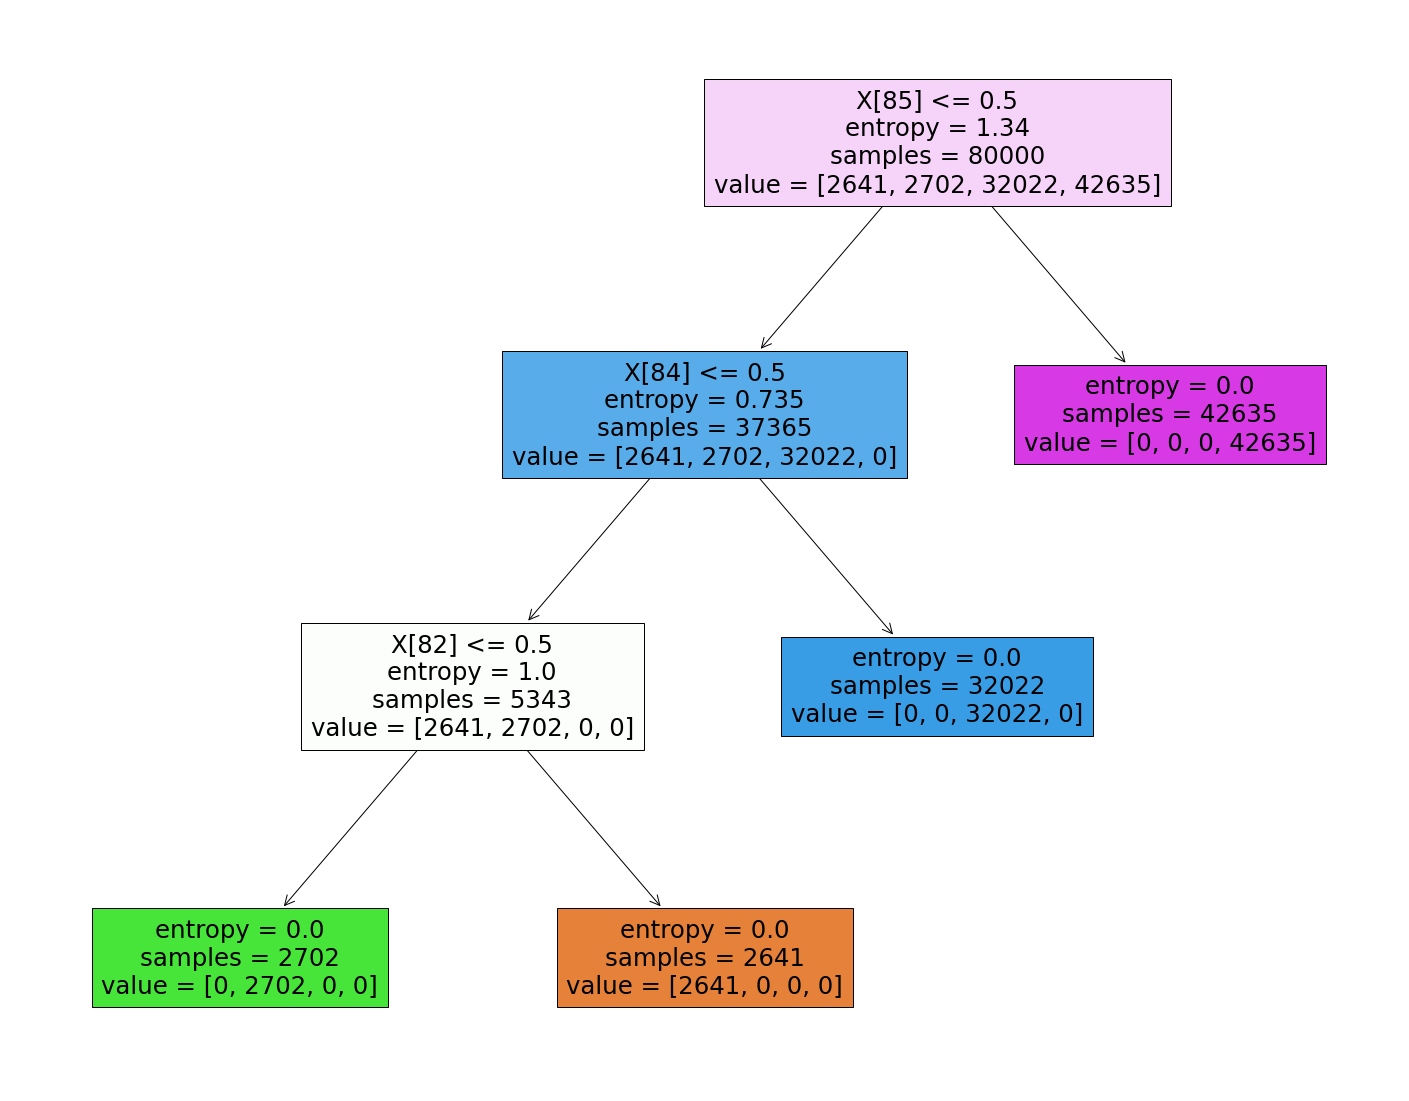

In [125]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   filled=True)

In [126]:
print(df_dt.iloc[ 0:2 , 85])
print(df_dt.iloc[ 0:2 , 84])
print(df_dt.iloc[ 0:2 , 82])

0    0
1    0
Name: Alcohol_usage_Sometimes , dtype: uint8
0    0
1    0
Name: Alcohol_usage_Occasionally, dtype: uint8
0    1
1    1
Name: Alcohol_usage_Daily, dtype: uint8


In [132]:
'''After performing this algorithm, we have seen that Alcohol_usage is able to directly predict the chosen label.
So, we have performed feature selection by removing this feature from our dataset. 
Now, we are going to perform decision tree algorithm again after removing alcohol usage feature '''

df_dt=df_dt.drop('Alcohol_usage',1)

In [133]:
y=df_dt['Stress_nervous_habits']
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers

# transform categorical data to numerical data
print(df_dt.dtypes)
df_dt=pd.get_dummies(df_dt.drop('Stress_nervous_habits',axis=1))
#df_dt['Stress_nervous_habits']=y_encoded
display(HTML(df_dt.head(3).to_html()))
print(df_dt.shape)

# by hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(df_dt, y_encoded, test_size=0.2)
clf=DecisionTreeClassifier(criterion='entropy') # note: there are many parameters in API
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Tree Accuracy by hold-out evaluation: ',acc)


Age                                                 object
Gender                                              object
Sector                                              object
Working_same_sector                                 object
Specialization                                      object
Work_hours                                          object
Work_years_span                                     object
Patient_per_day                                     object
Overtime_work_interest                              object
Overtime_work_paid                                  object
Stressed_during_work                                object
Feeling_on_job                                      object
Source_of_stress                                    object
Handling_stress                                     object
Inform_Management_problems                          object
Management_initiative_to_problems                   object
Hospital_care_towards_stress                        obje

,Age_30:40,Age_40:50,Age_50:60,Gender_Female,Gender_Male,Sector_Private,Sector_Public,Working_same_sector_Above 5 years,Working_same_sector_Below 5 years,Specialization_Anesthetic,Specialization_Casualty medical officer,Specialization_Counselor,Specialization_Critical Care Medicine,Specialization_Fetal medicine,Specialization_General Practitioner,Specialization_Gynecology,Specialization_Neurology,Specialization_Pathology,Specialization_Pediatrics,Specialization_Radiologist,Specialization_Surgeon,Work_hours_ 10hrs,Work_hours_ More than 10hrs,Work_hours_5hrs,Work_years_span_ Above 10 Years,Work_years_span_ Between 5 to 10 years,Work_years_span_Below 5 years,Patient_per_day_ Between 10-20,Patient_per_day_ Between 20-30,Patient_per_day_Above 30,Patient_per_day_Below 10,Overtime_work_interest_ No,Overtime_work_interest_ Yes,Overtime_work_paid_No,Overtime_work_paid_Yes,Stressed_during_work_Never,Stressed_during_work_Sometimes,Stressed_during_work_Very Often,Feeling_on_job_= I sometimes feel dissatisfied but generally enjoy my job,Feeling_on_job_I am completely happy and enjoying the job,Feeling_on_job_I have no interest at all in my work,Feeling_on_job_Most of the time I do not enjoy my work,Source_of_stress_2.4984761293685964,Source_of_stress_All above in different proportions,Source_of_stress_Family Issues,Source_of_stress_Hospital Management,Source_of_stress_Over work,Source_of_stress_Patient Attitude,Handling_stress_ Drugs / Alcohol / Smoking,Handling_stress_Taking a sleep,Handling_stress_Talking to an expert,Handling_stress_Talking to the employer,Handling_stress_Talking to your family members,Inform_Management_problems_No,Inform_Management_problems_Yes,Management_initiative_to_problems_ No action was taken,Management_initiative_to_problems_Effective method was imposed,Management_initiative_to_problems_Taken but was not effective,Hospital_care_towards_stress_3,Hospital_care_towards_stress_4,Hospital_care_towards_stress_Counselling,Hospital_care_towards_stress_Rearranging the work timing,Stress_affecting_patient_care_No,Stress_affecting_patient_care_Yes,Stress_affecting_concentration_Never,Stress_affecting_concentration_Somewhat,Stress_affecting_concentration_Very often,Effort_to_reduce_stress_to_improve_concentration_Lot of effort,Effort_to_reduce_stress_to_improve_concentration_No effort,Effort_to_reduce_stress_to_improve_concentration_Some effort,Stress_due_to_too_many_duties_No,Stress_due_to_too_many_duties_Yes,Stress_due_to_age_No,Stress_due_to_age_Yes,Stress_reason_family_No,Stress_reason_family_Yes,Stress_due_to_competition_No,Stress_due_to_competition_Yes,Prefer_to_stay_alone_No,Prefer_to_stay_alone_Yes,Prefer_taking_responsibilities_No,Prefer_taking_responsibilities_Yes
0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
2,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1


(100000, 82)
Tree Accuracy by hold-out evaluation:  0.99715


In [134]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_38 <= 0.50
|   |--- feature_44 <= 0.50
|   |   |--- feature_32 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_32 >  0.50
|   |   |   |--- feature_71 <= 0.50
|   |   |   |   |--- feature_73 <= 0.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_73 >  0.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- feature_71 >  0.50
|   |   |   |   |--- class: 2
|   |--- feature_44 >  0.50
|   |   |--- class: 3
|--- feature_38 >  0.50
|   |--- feature_57 <= 0.50
|   |   |--- feature_18 <= 0.50
|   |   |   |--- feature_17 <= 0.50
|   |   |   |   |--- feature_77 <= 0.50
|   |   |   |   |   |--- feature_58 <= 0.50
|   |   |   |   |   |   |--- feature_22 <= 0.50
|   |   |   |   |   |   |   |--- feature_34 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_34 >  0.50
|   |   |   |   |   |   |   |   |--- feature_80 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- feature_80 > 

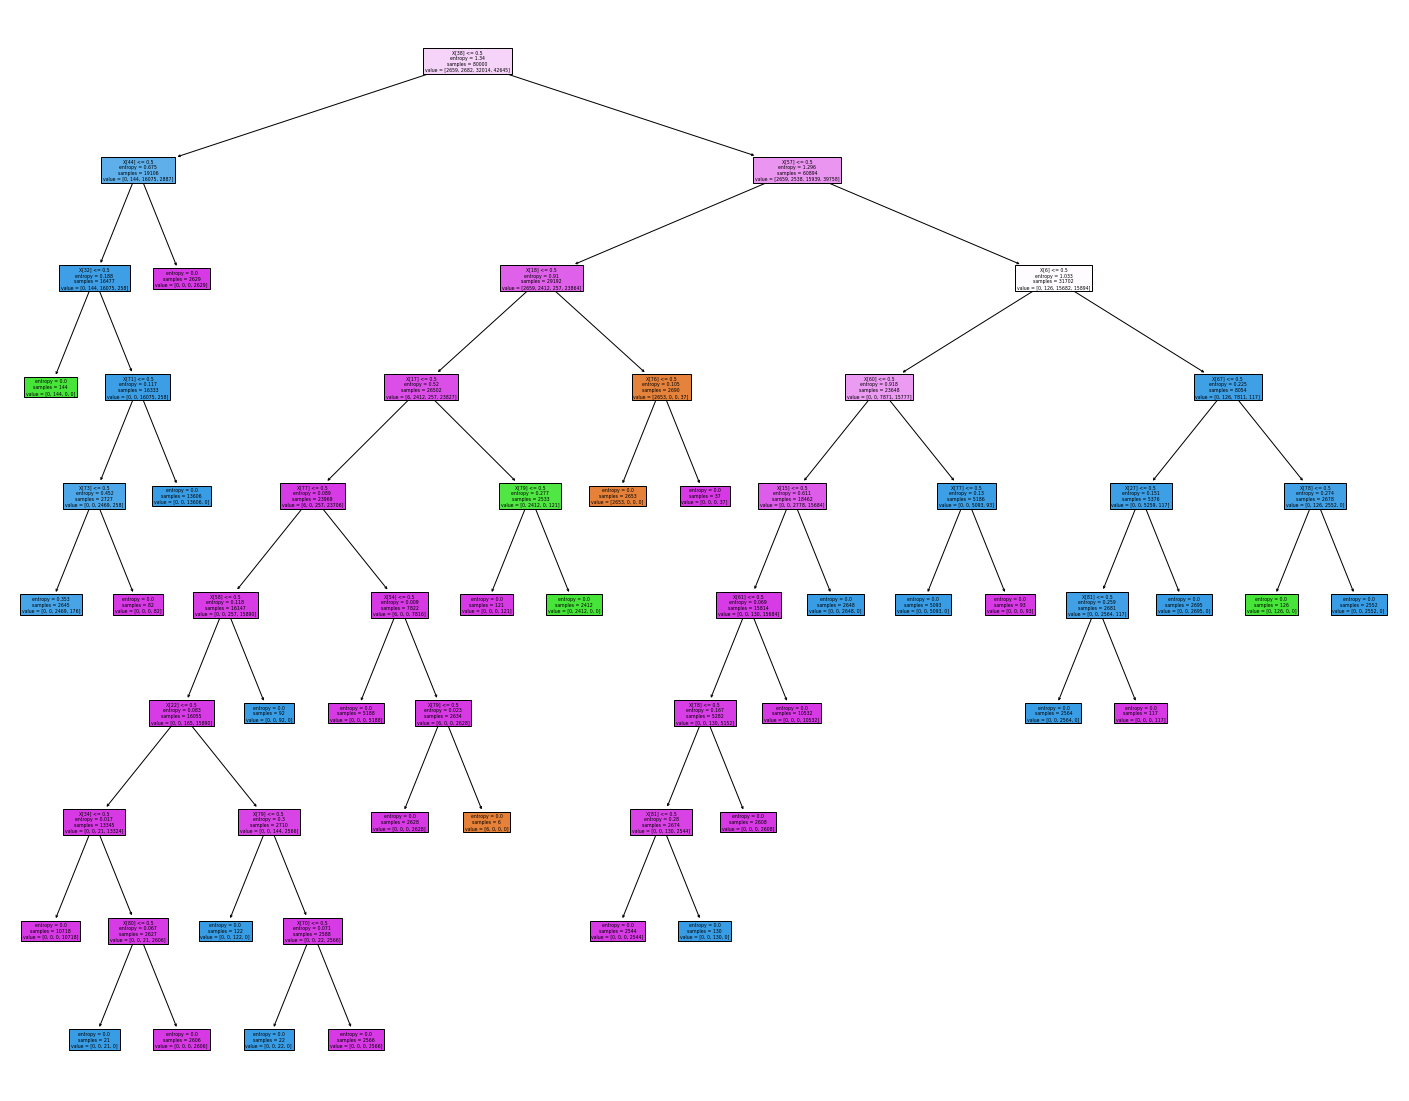

In [135]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   filled=True)

In [136]:
print(df_dt.iloc[ 0:2 , 38])
print(df_dt.iloc[ 0:2 , 44])
print(df_dt.iloc[ 0:2 , 57])

0    1
1    1
Name: Feeling_on_job_= I sometimes feel dissatisfied but generally enjoy my job, dtype: uint8
0    0
1    0
Name: Source_of_stress_Family Issues, dtype: uint8
0    0
1    0
Name: Management_initiative_to_problems_Taken but was not effective, dtype: uint8


These three last values we can see in the next image are: the first one, the root node and the other two are the next 
features which have the “second” highest information gain. In other words, they are the following best features to 
predict our label. The root node, Feeling_on_job, is the one that has the strongest relationship with our label. 
The next features are Source_of_stress and Management_initiative_to_problems.

In [ ]:
6. FEATURE REDUCTION

The main objective of performing a feature reduction is to reduce the dimensionality of our dataset, to convert our
original dataset to a lower dimensional space.  As input, we have our dataset and as output we will have a smaller number 
of new features which are called as principal components, product of the linear combination of the old features. 

Number of PCs:  17


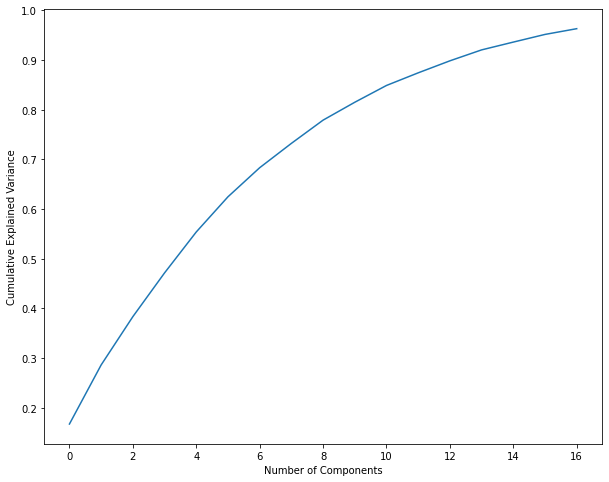

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Stress_nervous_habits
0,-0.461314,-0.572756,0.693614,0.027257,0.47127,-0.40538,-0.580912,0.296191,-0.127139,0.07056,-0.337792,-0.317482,0.126424,-0.24479,0.827173,0.585798,-0.033783,1
1,-0.461314,-0.572756,0.693614,0.027257,0.47127,-0.40538,-0.580912,0.296191,-0.127139,0.07056,-0.337792,-0.317482,0.126424,-0.24479,0.827173,0.585798,-0.033783,1
2,-0.461314,-0.572756,0.693614,0.027257,0.47127,-0.40538,-0.580912,0.296191,-0.127139,0.07056,-0.337792,-0.317482,0.126424,-0.24479,0.827173,0.585798,-0.033783,1
3,-0.461314,-0.572756,0.693614,0.027257,0.47127,-0.40538,-0.580912,0.296191,-0.127139,0.07056,-0.337792,-0.317482,0.126424,-0.24479,0.827173,0.585798,-0.033783,1
4,-0.461314,-0.572756,0.693614,0.027257,0.47127,-0.40538,-0.580912,0.296191,-0.127139,0.07056,-0.337792,-0.317482,0.126424,-0.24479,0.827173,0.585798,-0.033783,1


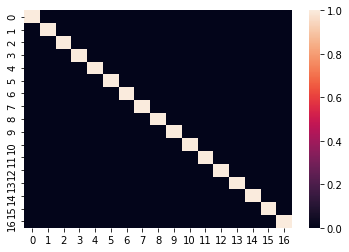

In [137]:
# PCA

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

label=df['Stress_nervous_habits']
df_pca=df.drop('Stress_nervous_habits',1)


    # PCA using 96% variance 

scalerPCA = MinMaxScaler()
Xscaled = scalerPCA.fit_transform(df_pca)
pca = PCA(n_components=0.96)  
pca.fit(Xscaled)
Xreduced = pca.transform(Xscaled)
df_red = pd.DataFrame(Xreduced)

print("Number of PCs: ",pca.n_components_)

    # Seeing the relation between the variance and the number of components
    # To select the right variance
plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


corr_graph = df_red.corr() # Heat map of correlation matrix
sns.heatmap(corr_graph, 
        xticklabels=corr_graph.columns,
        yticklabels=corr_graph.columns)

# Add our label to our new dataframe 
df_red['Stress_nervous_habits']=label


display(HTML(df_red.head(5).to_html()))

